<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/VGG16_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras. metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [26]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [27]:
train_path = "/content/drive/My Drive/NEU_New/train"
valid_path = "/content/drive/My Drive/NEU_New/valid"
test_path =  "/content/drive/My Drive/NEU_New/test"

In [28]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1620 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [29]:
assert train_batches.n == 1620
assert valid_batches.n == 120
assert test_batches.n == 60
assert train_batches.num_classes == valid_batches.num_classes ==test_batches.num_classes == 6

In [30]:
vgg16_model =tf.keras.applications.vgg16.VGG16()

In [31]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [33]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [35]:
for layer in model.layers:
    layer.trainable = False

In [36]:
model.add(Dense(units=6, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
print('Compiled!')

Compiled!


In [39]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
162/162 - 1290s - loss: 0.7379 - accuracy: 0.8019 - val_loss: 0.2764 - val_accuracy: 0.9500
Epoch 2/10
162/162 - 20s - loss: 0.1683 - accuracy: 0.9784 - val_loss: 0.1555 - val_accuracy: 0.9667
Epoch 3/10
162/162 - 20s - loss: 0.0925 - accuracy: 0.9889 - val_loss: 0.0933 - val_accuracy: 0.9917
Epoch 4/10
162/162 - 20s - loss: 0.0618 - accuracy: 0.9926 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 5/10
162/162 - 20s - loss: 0.0451 - accuracy: 0.9963 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 6/10
162/162 - 20s - loss: 0.0348 - accuracy: 0.9988 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 7/10
162/162 - 20s - loss: 0.0282 - accuracy: 0.9994 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 8/10
162/162 - 20s - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 9/10
162/162 - 20s - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 10/10
162/162 - 20s - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0239 - val_accu

In [40]:
test_labels = test_batches.classes

In [41]:
predictions = model.predict(x=test_batches, verbose=0)

In [42]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
       print("Confusion matrix, without normalization ")
    
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [44]:
test_batches.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

Confusion matrix, without normalization 
[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]


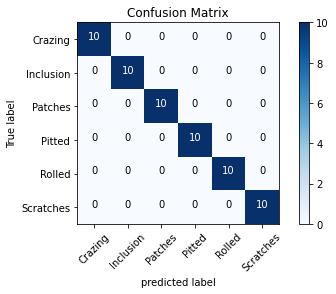

In [45]:
cm_plot_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

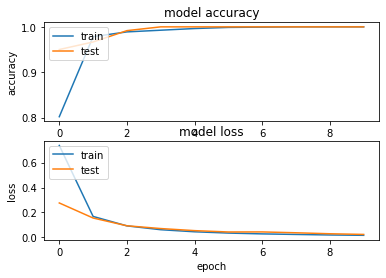

In [46]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()